In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import lasio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
las1 = lasio.read(r'\Downloads\EarthBank_Data_2021-07-28 09_52\30_2-2.las')
las2 = lasio.read(r'\Downloads\EarthBank_Data_2021-07-28 09_52\30_2-3.las')

In [4]:
df1 = las1.df()
df2 = las2.df()

df_idx1 = df1.rename_axis('Depth').reset_index()  #30/2-2
df_idx2 = df2.rename_axis('Depth').reset_index()  #30/2-3

df_dropped = df_idx1.dropna(subset=[ 'NPHI_ED','DEN_ED'],axis=0, how='any')
df_dropped = df_idx2.dropna(subset=[ 'NPHI_ED','DEN_ED'],axis=0, how='any')



In [5]:
def log_plot(logs):
    logs = logs.sort_values(by='Depth')
    top = logs.Depth.min()
    bot = logs.Depth.max()
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12,8))
    
    ax[0].plot(logs.CALI, logs.Depth, color='grey')
    ax[1].plot(logs.GR_ED, logs.Depth, color='black')
    ax[2].plot(logs.DT_ED, logs.Depth, color='blue')
    ax[3].plot(logs.RDEP_ED, logs.Depth, color='green')
    ax[4].plot(logs.DEN_ED, logs.Depth, color='c')
    ax[5].plot(logs.NPHI_ED,logs.Depth, color = 'red')
    ax[6].plot(logs.VSH33, logs.Depth, color='m')
    
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("CALI [in]")
    ax[0].set_xlim(logs.CALI.min(),logs.CALI.max())
    ax[0].set_ylabel("Depth(m)")
    ax[1].set_xlabel("GR_ED [gapi]")
    ax[1].set_xlim(logs.GR_ED.min(),logs.GR_ED.max())
    ax[2].set_xlabel("DT_ED [us/f]")
    ax[2].set_xlim(logs.DT_ED.min(),logs.DT_ED.max())
    ax[3].set_xlabel("RDEP_ED [ohm.m]")
    ax[3].set_xscale("log")
    ax[3].set_xlim(logs.RDEP_ED.min(),900)
    ax[4].set_xlabel("DEN_ED [g/cc]")
    ax[4].set_xlim(logs.DEN_ED.min(),logs.DEN_ED.max())
    ax[5].set_xlim(logs.NPHI_ED.min(),logs.NPHI_ED.max())
    ax[5].set_xlabel("NPHI [frac]")
    ax[6].set_xlim(logs.VSH33.min(),logs.VSH33.max())
    ax[6].set_xlabel("Vsh %")
 


    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]);
    ax[6].set_yticklabels([])

    f.suptitle('Well: 30/2-3', fontsize=14,y=0.94)

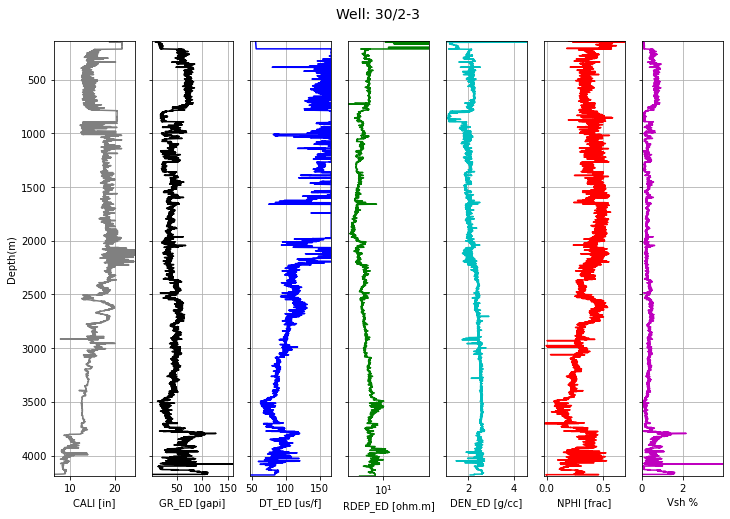

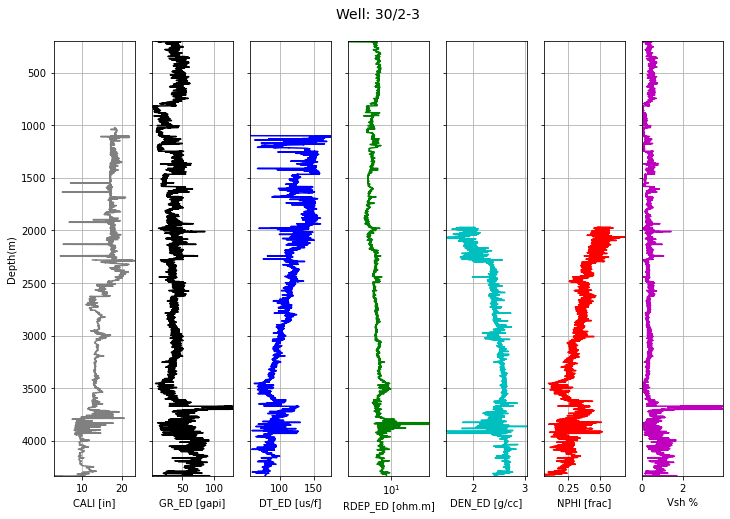

In [6]:
log_plot(df_idx1)
log_plot(df_idx2)

In [7]:
Phi_o = .74
lam = 1500
z = (df_idx1.Depth)
Vw = 1.5 #km s^-1
Vsg = 5.5 # +- 0.5 kms^-1
phi = Phi_o * np.exp(-z/lam)
phi


t = ((z/Vsg) + (Phi_o * lam)*((1/ Vw) - (1/ Vsg))*(1 - np.exp(-z/lam)))*2
#t -  time in [ms]

t

0         149.873895
1         150.028723
2         150.183541
3         150.338348
4         150.493146
            ...     
26560    2534.411663
26561    2534.473772
26562    2534.535881
26563    2534.597989
26564    2534.660096
Name: Depth, Length: 26565, dtype: float64

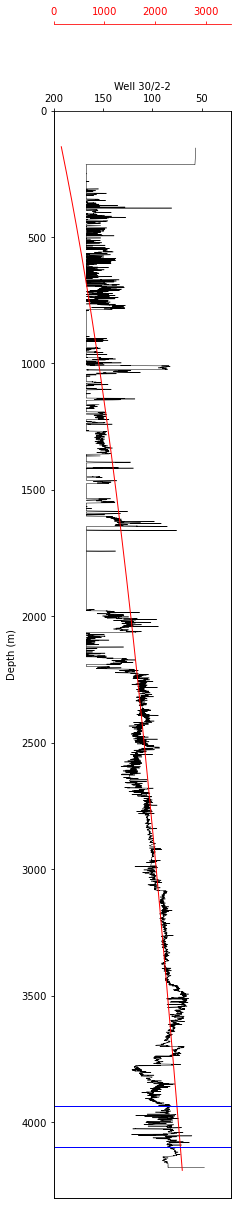

In [8]:
fig = plt.subplots(figsize=(7,20))

ax1 = plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=1)
ax2 = ax1.twiny()

ax1.plot('DT_ED', 'Depth', data=df_idx1, color='black', lw=0.5)
ax1.set_xlim(200,20)
ax1.set_xlabel('DT[um/f]')
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")

ax2.plot(t, 'Depth', data=df_idx1, color='red', lw=1)
ax2.set_xlim(0,3500)
ax1.set_xlabel('Well 30/2-2')

ax2.xaxis.label.set_color("red")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")

#ax1.set_xscale("log")
#ax2.set_xscale("log")

#ax1.set_yscale("log")


for ax in [ax1, ax2]:
    ax.set_ylim(4300, 0)
    ax.set_ylabel ("Depth (m)")
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    #labels
    ax.axhline(y =3935, c= 'blue', lw =1)  #Tarbert
    ax.axhline(y =4098, c= 'blue', lw =1)  #Oseberg
  
plt.savefig("3022NCTL.png",bbox_inches = 'tight', pad_inches =1)

In [9]:
Phi_o = .71
lam = 1550
z = (df_idx2.Depth)
Vw = 1.5 #km s^-1
Vsg = 5.5 # +- 0.5 kms^-1
phi = Phi_o * np.exp(-z/lam)
phi


t = ((z/Vsg) + (Phi_o * lam)*((1/ Vw) - (1/ Vsg))*(1 - np.exp(-z/lam)))*2
#t -  time in [ms]

t

0         201.908321
1         202.055958
2         202.203587
3         202.351206
4         202.498816
            ...     
27141    2578.933558
27142    2578.995371
27143    2579.057184
27144    2579.118997
27145    2579.180809
Name: Depth, Length: 27146, dtype: float64

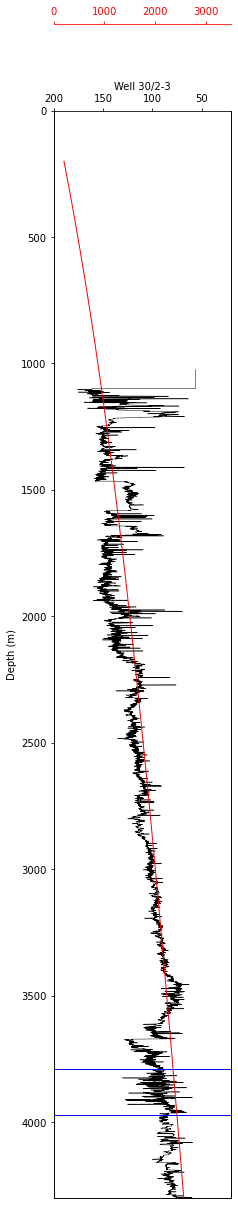

In [10]:
fig = plt.subplots(figsize=(7,20))

ax1 = plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=1)
ax2 = ax1.twiny()

ax1.plot('DT_ED', 'Depth', data=df_idx2, color='black', lw=0.5)
ax1.set_xlim(200,20)
ax1.set_xlabel('DT[um/f]')
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")

ax2.plot(t, 'Depth', data=df_idx2, color='red', lw=1)
ax2.set_xlim(0,3500)
ax1.set_xlabel('Well 30/2-3')

ax2.xaxis.label.set_color("red")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")

#ax1.set_xscale("log")
#ax2.set_xscale("log")

#ax1.set_yscale("log")


for ax in [ax1, ax2]:
    ax.set_ylim(4300, 0)
    ax.set_ylabel ("Depth (m)")
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    #labels
    ax.axhline(y =3792, c= 'blue', lw =1)  #Tarbert
    ax.axhline(y =3974, c= 'blue', lw =1)  #Oseberg
  
plt.savefig("3023NCTL.png",bbox_inches = 'tight', pad_inches =1)

In [11]:
sns.set_style('white',{'axes.facecolor':'white'})

vis1= sns.lmplot(data=df_idx2, x='Over_Pressure_MPa', y = 'TVD_SS', fit_reg = False, hue = "Formation", size = 7, aspect = 1, legend = False)

vis1.axes[0][0].invert_yaxis()
for ax in vis1.axes[0]:
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(True)  



plt.axvline(x=0,ls=':', lw=3, label='Hydrostatic reference')



    
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
plt.ylabel('Depth (TVD_ss)', fontsize=20, color = 'grey')
plt.xlabel('Over Pressure (MPa)', fontsize=20, color = 'grey')
plt.title('Over Pressured Wells', fontsize=20, color = 'black')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(ncol = 3, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('allwellsOverP.png')

plt.show()

KeyError: "None of [Index(['Formation', 'Over_Pressure_MPa', 'TVD_SS'], dtype='object')] are in the [columns]"

In [12]:
df_idx2.head()

,Depth,CALI,DEN_ED,DT_ED,GR_ED,NPHI_ED,RDEP_ED,VSH33
0,199.9976,NaN,NaN,NaN,8.3398,NaN,NaN,0.042086
1,200.1500,NaN,NaN,NaN,9.5189,NaN,NaN,0.051058
2,200.3024,NaN,NaN,NaN,10.6978,NaN,NaN,0.060245
3,200.4548,NaN,NaN,NaN,11.8768,NaN,NaN,0.069654
4,200.6072,NaN,NaN,NaN,13.0559,NaN,NaN,0.079291
